In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [64]:
df = pd.read_csv('indian_liver_patient.csv')

In [65]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [66]:
df.isnull().sum()
df = df.dropna(axis=0)

In [67]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(['Gender','Dataset'], axis=1), df['Dataset'],test_size=0.25, random_state=0)

In [68]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [69]:
svm_clf = SVC(kernel='rbf' , gamma = 0.001 , C = 1)
knn_clf = KNeighborsClassifier(n_neighbors = 3)
dt = DecisionTreeClassifier(max_depth = 3 , criterion = 'entropy' , random_state = 2018)
ada = AdaBoostClassifier(base_estimator = dt , n_estimators = 1000 , learning_rate = 0.1 , random_state = 2018)
mlp = MLPClassifier(activation = 'logistic' , solver = 'sgd' , learning_rate_init = 0.001 , learning_rate = 'constant' , alpha = 1e-4 , hidden_layer_sizes = (100,) , max_iter = 5000 , shuffle = True , random_state = 2018 )

In [70]:
svm_clf.fit(X_train , y_train)
knn_clf.fit(X_train , y_train)
ada.fit(X_train , y_train)
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', max_iter=5000, random_state=2018,
              solver='sgd')

In [71]:
svm_pred = svm_clf.predict(X_test)
knn_pred = knn_clf.predict(X_test)
ada_pred = ada.predict(X_test)
mlp_pred = mlp.predict(X_test)

In [72]:
print("Accuracy Score SVM" , accuracy_score(y_test , svm_pred))
print("Accuracy Score KNN" , accuracy_score(y_test , knn_pred))
print("Accuracy Score AdaBoost" , accuracy_score(y_test , ada_pred))
print("Accuracy Score MLP" , accuracy_score(y_test , mlp_pred))

Accuracy Score SVM 0.6896551724137931
Accuracy Score KNN 0.6275862068965518
Accuracy Score AdaBoost 0.6827586206896552
Accuracy Score MLP 0.7172413793103448


In [73]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=682)
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

In [74]:
print("Accuracy Score RandomForest" , accuracy_score(y_test , Y_pred_rf))
print(classification_report(y_test , Y_pred_rf))
print(confusion_matrix(y_test , Y_pred_rf))

Accuracy Score RandomForest 0.6482758620689655
              precision    recall  f1-score   support

           1       0.72      0.83      0.77       104
           2       0.31      0.20      0.24        41

    accuracy                           0.65       145
   macro avg       0.52      0.51      0.51       145
weighted avg       0.61      0.65      0.62       145

[[86 18]
 [33  8]]


In [75]:
max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

71.03
784


In [76]:
knn_scores = []
for k in range(1,100):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

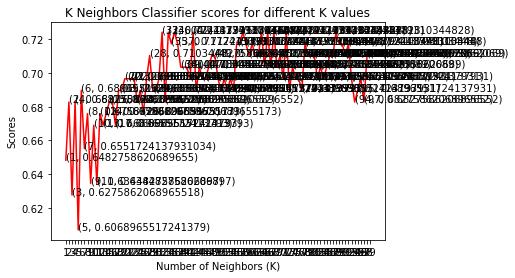

In [77]:
plt.plot(figsize=(20,20))
plt.plot([k for k in range(1, 100)], knn_scores, color = 'red')
for i in range(1,100):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 100)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [83]:
print(knn_scores.index(max(knn_scores)))

31


In [87]:
knn_classifier = KNeighborsClassifier(n_neighbors = 32)
knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_test, y_test)

0.7241379310344828

In [88]:
import joblib
joblib.dump(ada,'ModelLiverDisease.pkl')

['ModelLiverDisease.pkl']

In [89]:
modelReload=joblib.load('ModelLiverDisease.pkl')

In [90]:
X = df.drop(['Gender','Dataset'], axis=1)
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40


In [91]:
Y = df['Dataset']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [92]:
len(X)

579

In [93]:
for i in range(579):
    testDtaa = pd.DataFrame({'x':X.iloc[i]}).transpose()
    print(modelReload.predict(testDtaa)[0],Y[i])

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
2 2
1 1
1 1
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 1
1 1
1 1
2 2
1 1
1 1
1 1
2 2
2 2
1 1
1 1
2 2
2 2
2 2
1 1
2 2
1 1
1 1
1 1
1 1
2 2
2 2
1 1
2 2
1 2
2 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
2 2
2 2
1 1
2 2
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
2 2
1 1
1 1
1 1
1 1
1 1
1 2
1 1
1 1
1 2
1 1
1 1
1 1
2 2
1 1
1 1
1 1
2 2
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
2 2
2 2
2 1
1 2
1 1
2 2
2 2
2 2
2 2
2 2
2 2
1 1
2 2
1 1
2 2
2 2
1 1
1 1
1 1
1 1
1 1
1 1
1 2
1 1
2 2
2 2
1 1
1 1
1 1
1 1
1 1
2 2
2 2
1 1
2 1
1 1
1 1
1 1
1 1
1 1
2 2
1 1
1 1
1 1
1 1
2 2
1 1
1 1
1 1
1 1
2 2
1 1
1 1
2 2
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
2 1
1 1
1 1
1 1
1 1
1 1
1 1
2 2
1 1
1 1
2 2
1 1
1 1
1 1
2 2
1 1
1 1
1 1
2 2
2 2
1 1
1 1
1 1
2 2
1 1
1 1
1 1
2 2
2 2
2 2
1 1
1 1
1 1
1 1


KeyError: 209